# Data Analytics Pathway Assessment

## by Richmond Tetteh


This is for the running the model to be hosted on a url


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Upload the ZIP file
from google.colab import files
uploaded = files.upload()


Saving data_4.zip to data_4.zip


In [3]:
import zipfile
import io

# Get the uploaded ZIP file name
data_4 = list(uploaded.keys())[0]

# Extract the ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded[data_4]), 'r') as zip_ref:
    zip_ref.extractall("extracted")  # Extract to a folder named 'extracted'

In [4]:
# Read the CSV file from the extracted folder
bank_additional_full = pd.read_csv("extracted/data/bank-additional-full.csv", delimiter=';')

# Preview the dataset
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Repeat Data Cleaning

In [5]:
# Make copies of original pieces of data
bank_additional_full_clean = bank_additional_full.copy()

Issue #1: Handling Missing Values of Default Column




Define:
Drop the column default because it has a high count of missing values (8597)

Code

In [6]:
# Drop default column
bank_additional_full_clean = bank_additional_full_clean.drop('default', axis=1)


Test

In [7]:
bank_additional_full_clean.head(2)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Storing Data
# Save gathered, assessed, and cleaned master dataset to a CSV file named "bank_archive_master.csv.

bank_additional_full_clean.to_csv('bank_archive_master', index = False)

In [9]:
# load in the dataset into a pandas dataframe
bank_graph = pd.read_csv('bank_archive_master')

Check class imbalance of y

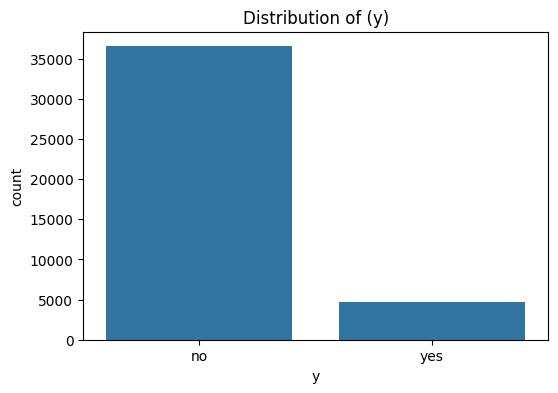


Class Distribution:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [10]:
# Check class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank_graph)
plt.title("Distribution of (y)")
plt.show()

# Percentage of 'yes' (1) vs 'no' (0)
print("\nClass Distribution:")
print(bank_graph['y'].value_counts(normalize=True) * 100)

The target variable y is imbalanced (11.26% for "yes" and 88.73% for "no"),

In [11]:
# Binary encoding for target (y)
bank_additional_full_clean['y'] = bank_additional_full_clean['y'].map({'no':0, 'yes':1})

In [12]:
# One-hot encode nominal variables
nominal_features = ['job', 'marital', 'contact', 'poutcome']
bank_additional_full_clean = pd.get_dummies(bank_additional_full_clean, columns=nominal_features, drop_first=True)

In [13]:
# Ordinal encode education
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
                  'high.school', 'professional.course', 'university.degree']
bank_additional_full_clean['education'] = bank_additional_full_clean['education'].map({v:k for k,v in enumerate(education_order)})


In [14]:
# Create month mapping dictionary
month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
# Cyclical encode month
bank_additional_full_clean['month_sin'] = np.sin(2 * np.pi * bank_additional_full_clean['month'].map(month_to_num)/12)
bank_additional_full_clean['month_cos'] = np.cos(2 * np.pi * bank_additional_full_clean['month'].map(month_to_num)/12)

In [15]:
bank_additional_full_clean.head(5)

,age,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos
0,56,1.0,no,no,may,mon,261,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025
1,57,4.0,no,no,may,mon,149,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025
2,37,4.0,yes,no,may,mon,226,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025
3,40,2.0,no,no,may,mon,151,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025
4,56,4.0,no,yes,may,mon,307,1,999,0,...,False,False,True,False,False,True,True,False,0.5,-0.866025


In [16]:
day_to_num = {
    'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4, 'sat':5, 'sun':6
}

# Cyclical encode day
bank_additional_full_clean['day_sin'] = np.sin(2 * np.pi * bank_additional_full_clean['day_of_week'].map(day_to_num)/7)
bank_additional_full_clean['day_cos'] = np.cos(2 * np.pi * bank_additional_full_clean['day_of_week'].map(day_to_num)/7)

In [17]:
# Drop original month and day of the week columns
bank_additional_full_clean = bank_additional_full_clean.drop(['month', 'day_of_week'], axis=1)

In [18]:
#  Handle remaining binary features
binary_cols = ['housing', 'loan']
for col in binary_cols:
    bank_additional_full_clean[col] = bank_additional_full_clean[col].replace({'no':0, 'yes':1, 'unknown':2})

<ipython-input-18-1495913434>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_additional_full_clean[col] = bank_additional_full_clean[col].replace({'no':0, 'yes':1, 'unknown':2})


In [19]:
# Final Check
bank_additional_full_clean.head(5)

,age,education,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,marital_married,marital_single,marital_unknown,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos
0,56,1.0,0,0,261,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0
1,57,4.0,0,0,149,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0
2,37,4.0,1,0,226,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0
3,40,2.0,0,0,151,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0
4,56,4.0,0,1,307,1,999,0,1.1,93.994,...,True,False,False,True,True,False,0.5,-0.866025,0.0,1.0


In [20]:
bank_additional_full_clean.housing.value_counts()

,count
housing,
1,21576
0,18622
2,990


In [21]:
bank_additional_full_clean.dtypes

,0
age,int64
education,float64
housing,int64
loan,int64
duration,int64
campaign,int64
pdays,int64
previous,int64
emp.var.rate,float64
cons.price.idx,float64


In [22]:
print("\nData shape after:", bank_additional_full_clean.shape)


Data shape after: (41188, 35)


Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X = bank_additional_full_clean.drop('y', axis=1)
y = bank_additional_full_clean['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Handle Class Imbalance

SMOTE

In [24]:
# Check which columns have missing values
print(X_train.isnull().sum())

# Or check total missing values
print(X_train.isnull().sum().sum())

age                        0
education               1397
housing                    0
loan                       0
duration                   0
campaign                   0
pdays                      0
previous                   0
emp.var.rate               0
cons.price.idx             0
cons.conf.idx              0
euribor3m                  0
nr.employed                0
job_blue-collar            0
job_entrepreneur           0
job_housemaid              0
job_management             0
job_retired                0
job_self-employed          0
job_services               0
job_student                0
job_technician             0
job_unemployed             0
job_unknown                0
marital_married            0
marital_single             0
marital_unknown            0
contact_telephone          0
poutcome_nonexistent       0
poutcome_success           0
month_sin                  0
month_cos                  0
day_sin                    0
day_cos                    0
dtype: int64
1

In [25]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align labels with remaining samples

In [26]:
print(X_train.isnull().sum().sum())

0


In [27]:

from imblearn.over_sampling import SMOTE

# Perform SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Baseline Model Training

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression (Linear baseline)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train);

# Random Forest (Non-linear baseline)
rf = RandomForestClassifier()
rf.fit(X_train, y_train);  # No scaling needed

Evaluation Metrics

In [29]:
from sklearn.metrics import classification_report, roc_auc_score

# For Random Forest
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7310
           1       0.68      0.50      0.58       928

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238

ROC-AUC: 0.7369020944384169


Feature Importance Analysis


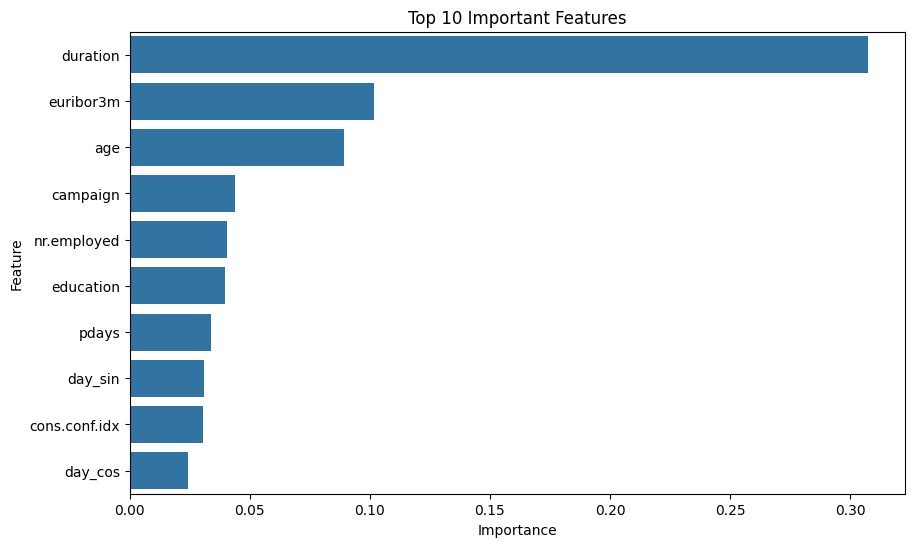

In [30]:
# For Random Forest
importances = rf.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

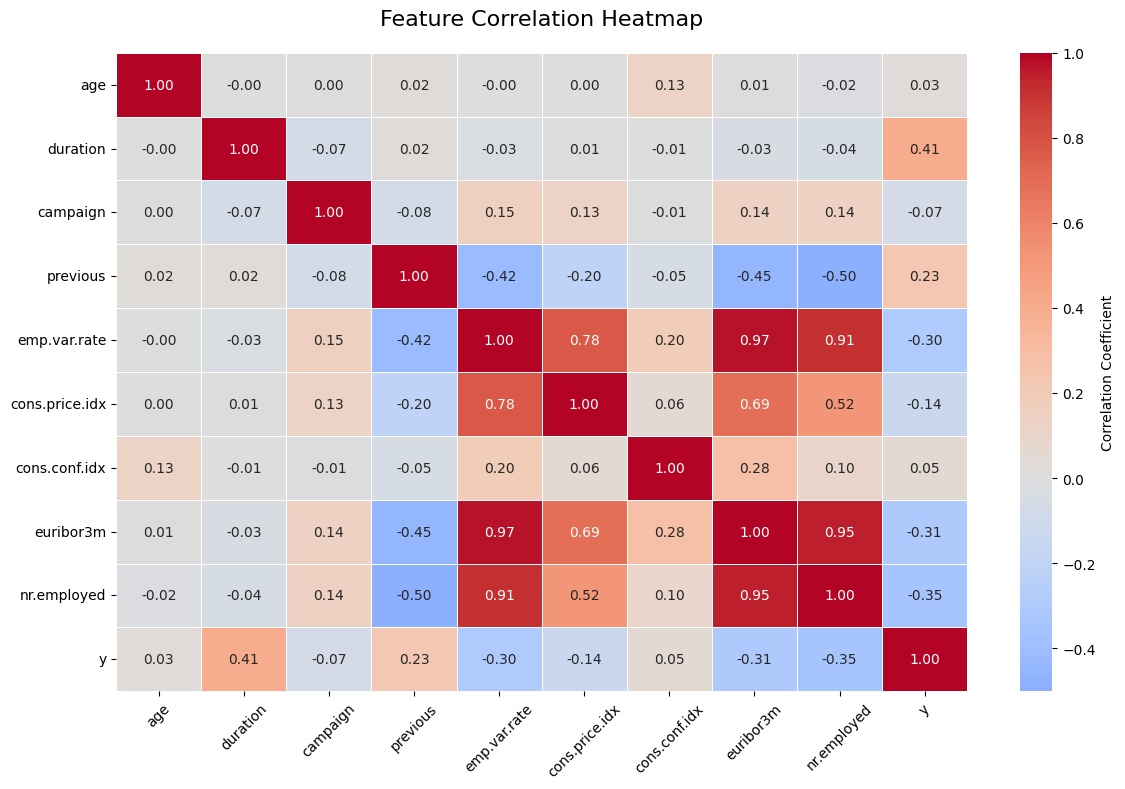

In [31]:
#Select numerical columns (exclude encoded categoricals for clarity)
numerical_cols = ['age', 'duration', 'campaign', 'previous',
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                 'euribor3m', 'nr.employed', 'y']
numerical_data = bank_additional_full_clean[numerical_cols]

# Calculate correlations
corr_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Feature Correlation Heatmap", pad=20, fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

From the correlation heatmap the following can be observed:

1. Strong Positive Correlations

*   emp.var.rate and euribor3m (0.97)
*   emp.var.rate and nr.employed (0.91)
*  euribor3m and nr.employed (0.95)

The trio of emp.var.rate, euribor3m, and nr.employed show extremely high intercorrelation, suggesting they measure related economic conditions.

2. Strong Negative Correlations

*   previous and emp.var.rate (-0.42)
*  previous and nr.employed (-0.50)

3. Target Variable (y) Correlations

*   duration shows the strongest positive correlation with the target (0.41)
*   nr.employed has the strongest negative correlation (-0.35)
*   Most of the other features show weak correlations with the target variable










#Feature Engineering

Campaign Timing Features

In [32]:
# Days since last campaign contact (replace 999 with NaN first)
bank_additional_full_clean['days_since_last_contact'] = bank_additional_full_clean['pdays'].replace(999, np.nan)

# Call duration in minutes (instead of seconds)
bank_additional_full_clean['duration_min'] = bank_additional_full_clean['duration'] / 60

# Call duration bins (e.g., short/medium/long calls)
bank_additional_full_clean['duration_bin'] = pd.cut(bank_additional_full_clean['duration'],
                             bins=[0, 60, 300, float('inf')],
                             labels=['short', 'medium', 'long'])

In [33]:
bank_additional_full_clean.head(5)

,age,education,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,contact_telephone,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos,days_since_last_contact,duration_min,duration_bin
0,56,1.0,0,0,261,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,4.350000,medium
1,57,4.0,0,0,149,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,2.483333,medium
2,37,4.0,1,0,226,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,3.766667,medium
3,40,2.0,0,0,151,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,2.516667,medium
4,56,4.0,0,1,307,1,999,0,1.1,93.994,...,True,True,False,0.5,-0.866025,0.0,1.0,NaN,5.116667,long


Interaction Features

Verify Available Columns

In [34]:
print(bank_additional_full_clean.columns.tolist())

['age', 'education', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'days_since_last_contact', 'duration_min', 'duration_bin']


Economic Pressure Index

This combines macroeconomic indicators to gauge financial stress

In [35]:
bank_additional_full_clean['economic_pressure'] = (
    bank_additional_full_clean['euribor3m'] *
    bank_additional_full_clean['cons.price.idx'] /
    (bank_additional_full_clean['cons.conf.idx'] + 1e-6)
)

 Employment-Adjusted Campaign Impact

 This accounts for labor market conditions when evaluating call campaigns

In [36]:
bank_additional_full_clean['employment_call_impact'] = (
    bank_additional_full_clean['campaign'] /
    (bank_additional_full_clean['nr.employed'] + 1e-6)
)

Previous Contact Efficiency

This measures the success rate of past contacts:

In [37]:
bank_additional_full_clean['previous_efficiency'] = (
    bank_additional_full_clean['previous'] /
    (bank_additional_full_clean['days_since_last_contact'] + 1e-6)
)

Age × Employment Variation

This will identify if age groups respond differently to economic changes:

In [38]:
bank_additional_full_clean['age_economic_sensitivity'] = (
    bank_additional_full_clean['age'] *
    bank_additional_full_clean['emp.var.rate']
)

Duration-to-Campaign Ratio

The purpose of this is to captures call quality vs quantity

In [39]:
bank_additional_full_clean['duration_per_contact'] = (
    bank_additional_full_clean['duration_min'] /
    (bank_additional_full_clean['campaign'] + 1e-6)
)


Consumer Confidence Impact

Optimize for the best-performing model:

In [40]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'max_depth': 20, 'n_estimators': 200}


Drop low-importance features after testing

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bank_additional_full_clean[['economic_pressure', 'employment_call_impact']])

Feature Importance Check after model training

In [42]:
importances = grid.best_estimator_.feature_importances_
feature_df = pd.DataFrame({
    'Feature':  X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_df.head(10))

           Feature  Importance
4         duration    0.310859
11       euribor3m    0.101852
0              age    0.082195
12     nr.employed    0.052314
5         campaign    0.040910
6            pdays    0.037306
1        education    0.036470
32         day_sin    0.030015
10   cons.conf.idx    0.027206
9   cons.price.idx    0.024058


Save model for production:

In [43]:
import joblib

# Save the trained model
joblib.dump(rf, 'bank_predict_model.pkl')

# Later, load it back
trained_model = joblib.load('bank_predict_model.pkl')

#Make Predictions on New Data

In [44]:
new_bank_data = pd.read_csv("extracted/data/bank-additional.csv", delimiter=';')
new_bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [45]:
# Verify features of the loadec csv
print("Columns in new data:", new_bank_data.columns.tolist())

Columns in new data: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [46]:
# Verify  if the RandomForestClassifier or LogisticRegression model was saved
print(type(trained_model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


 Preprocess New Data to Match Training Format

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply one-hot encoding (same as during training)
new_data_encoded = pd.get_dummies(new_bank_data, columns=categorical_cols)

# Ensure all expected one-hot columns exist (even if empty in new data)
expected_features = trained_model.feature_names_in_
for feature in expected_features:
    if feature not in new_data_encoded.columns:
        new_data_encoded[feature] = 0

# Select and reorder columns to match training
X_new = new_data_encoded[expected_features]

In [48]:
# Ensure the month_to_num dictionary is defined or accessible here
month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Cyclical encode month using the month_to_num mapping
new_bank_data['month_sin'] = np.sin(2 * np.pi * new_bank_data['month'].map(month_to_num) / 12)
new_bank_data['month_cos'] = np.cos(2 * np.pi * new_bank_data['month'].map(month_to_num) / 12)

 Make Predictions and Display Output

In [49]:
#Generate predictions
predictions = trained_model.predict(X_new)
probabilities = trained_model.predict_proba(X_new)[:, 1]

# Add the predictions as a new column to the DataFrame
new_bank_data['prediction'] = predictions

# Add the probabilities as a new column to the DataFrame
new_bank_data['prediction_probability'] = probabilities

# Print the first 10 predictions to verify
print("\n--- First 10 Predictions ---")
print(new_bank_data[['age', 'job', 'marital', 'prediction', 'prediction_probability']].head(10))


--- First 10 Predictions ---
   age           job   marital  prediction  prediction_probability
0   30   blue-collar   married           0                    0.29
1   39      services    single           0                    0.06
2   25      services   married           0                    0.11
3   38      services   married           0                    0.03
4   47        admin.   married           0                    0.05
5   32      services    single           0                    0.14
6   32        admin.    single           1                    0.56
7   41  entrepreneur   married           0                    0.03
8   31      services  divorced           0                    0.04
9   35   blue-collar   married           0                    0.06


In [50]:
# Save full results to CSV
new_bank_data.to_csv('bank_predictions_results.csv', index=False)
print("\nPredictions saved to 'bank_predictions_results.csv'")


Predictions saved to 'bank_predictions_results.csv'


In [53]:
from flask import Flask, request, jsonify


app = Flask(__name__)

# Load the model. Note: The model was trained on data *after* NaNs were dropped.
# This means it cannot handle NaNs in input. We must ensure no NaNs reach the model.
model = joblib.load('bank_predict_model.pkl')

# Define mappings and orders used during training
# Education mapping (value: ordinal_rank)
education_mapping = {
    'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3,
    'high.school': 4, 'professional.course': 5, 'university.degree': 6
}

# Month and Day mappings for cyclical encoding
month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_to_num = {
    'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6
}

# List of nominal features for one-hot encoding
nominal_features = ['job', 'marital', 'contact', 'poutcome']

# List of binary features handled separately
binary_cols = ['housing', 'loan']
binary_mapping = {'no': 0, 'yes': 1, 'unknown': 2}

@app.route('/predict', methods=['POST'])
def predict():
    # Get input data as a dictionary
    data = request.json

    # Convert input dictionary to a pandas DataFrame (single row)

    try:
        input_df = pd.DataFrame([data])
    except ValueError as e:
        return jsonify({"error": f"Invalid input data format: {e}"}), 400

    # --- Preprocessing steps to transform to match training data format (X_train) ---

    # 1. Drop 'default' if it exists in the input
    if 'default' in input_df.columns:
        input_df = input_df.drop('default', axis=1)

    # 2. Handle 'housing' and 'loan' binary features
    for col in binary_cols:
        if col in input_df.columns:
            # Apply the mapping. .fillna(2) ensures 'unknown' is mapped to 2.
            input_df[col] = input_df[col].map(binary_mapping).fillna(2).astype(int)
        else:
             # If column is missing in input, add it with the 'unknown' representation (2)
             input_df[col] = 2


    # 3. Ordinal encode education
    if 'education' in input_df.columns:
        # Apply the ordinal mapping. Use .fillna(-1) to map 'unknown' or any other
        input_df['education'] = input_df['education'].map(education_mapping).fillna(-1).astype(int)
    else:
         # If education is missing, add it with the placeholder -1
         input_df['education'] = -1


    # 4. Cyclical encode month and day_of_week
    if 'month' in input_df.columns:
        # Map month string to number. If 'unknown' or missing, map to NaN, then fill NaN with 0.
        input_df['month_num'] = input_df['month'].map(month_to_num).fillna(0)
        input_df['month_sin'] = np.sin(2 * np.pi * input_df['month_num'] / 12)
        input_df['month_cos'] = np.cos(2 * np.pi * input_df['month_num'] / 12)
    else:
         # If month is missing, add columns with values corresponding to placeholder 0
         input_df['month_sin'] = np.sin(2 * np.pi * 0 / 12) # sin(0)
         input_df['month_cos'] = np.cos(2 * np.pi * 0 / 12) # cos(0)


    if 'day_of_week' in input_df.columns:
        input_df['day_num'] = input_df['day_of_week'].map(day_to_num).fillna(0)
        input_df['day_sin'] = np.sin(2 * np.pi * input_df['day_num'] / 7)
        input_df['day_cos'] = np.cos(2 * np.pi * input_df['day_num'] / 7)
    else:
        # If day_of_week is missing, add columns with values corresponding to placeholder 0
        input_df['day_sin'] = np.sin(2 * np.pi * 0 / 7) # sin(0)
        input_df['day_cos'] = np.cos(2 * np.pi * 0 / 7) # cos(0)


    # 5. Handle pdays for days_since_last_contact
    if 'pdays' in input_df.columns:
        # Replace 999 with NaN
        input_df['days_since_last_contact'] = input_df['pdays'].replace(999, np.nan)
    else:
         # If pdays is missing, days_since_last_contact should be NaN
         input_df['days_since_last_contact'] = np.nan


    # 6. Create duration_min
    if 'duration' in input_df.columns:
        # Duration is in seconds, convert to minutes
        input_df['duration_min'] = input_df['duration'] / 60
    else:
        # If duration is missing, duration_min should be NaN
        input_df['duration_min'] = np.nan


    input_df['economic_pressure'] = (
        input_df.get('euribor3m', np.nan) *
        input_df.get('cons.price.idx', np.nan) /
        (input_df.get('cons.conf.idx', np.nan) + 1e-6)
    )

    input_df['employment_call_impact'] = (
        input_df.get('campaign', np.nan) /
        (input_df.get('nr.employed', np.nan) + 1e-6)
    )

    input_df['previous_efficiency'] = (
        input_df.get('previous', np.nan) /
        (input_df['days_since_last_contact'] + 1e-6)
    ).replace([np.inf, -np.inf], np.nan)


    input_df['age_economic_sensitivity'] = (
        input_df.get('age', np.nan) *
        input_df.get('emp.var.rate', np.nan)
    )

    # Handle potential division by zero if campaign is 0
    input_df['duration_per_contact'] = (
        input_df.get('duration_min', np.nan) /
        (input_df.get('campaign', np.nan) + 1e-6)
    ).replace([np.inf, -np.inf], np.nan)


    # Drop original cyclical encoding base columns if they exist
    input_df = input_df.drop(columns=['month_num', 'day_num'], errors='ignore')

    # Drop original columns that were replaced or used for new features
    input_df = input_df.drop(columns=['month', 'day_of_week', 'pdays', 'duration'], errors='ignore')


    # 8. Perform one-hot encoding on the relevant columns
    input_encoded = pd.get_dummies(input_df, columns=nominal_features, drop_first=True)


    # 9. Ensure all expected columns are present and in the correct order
    # Get the feature names the model was trained on
    expected_features = model.feature_names_in_

    # Add missing columns with a default value
    for feature in expected_features:
        if feature not in input_encoded.columns:
            input_encoded[feature] = 0

    # Select and reorder columns to match the training data
    X_new = input_encoded[expected_features].copy()

    # 10. Handle any remaining NaNs. The training data had NaNs dropped.

    # Check for NaNs explicitly before prediction
    if X_new.isnull().sum().sum() > 0:
        print("Warning: NaNs detected in the preprocessed input data. Replacing with 0.")
        X_new = X_new.fillna(0)

    # Predict
    prediction = int(model.predict(X_new)[0])
    probability = float(model.predict_proba(X_new)[0][1])  # Probability of class "1" (yes)

    # Return the prediction and probability
    return jsonify({
        'prediction': prediction,
        'probability': probability
    })


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=10000, debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:10000
 * Running on http://172.28.0.12:10000
INFO:werkzeug:Press CTRL+C to quit


In [52]:
#!pip freeze > requirements.txt
